In [ ]:
#Gender classficatio using decision tree
import pandas as pd

In [ ]:
gender_data= pd.read_csv('gender_classification_v7.csv')

In [ ]:
gender_data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
# we have categorical data lets convert into numbers.
print(gender_data['gender'].value_counts())
gender_data['gender']= gender_data['gender'].replace({'Male':0, 'Female':1})
gender_data.head()

Female    2501
Male      2500
Name: gender, dtype: int64


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


#Data splitting and Model making

In [ ]:
from sklearn.model_selection import train_test_split
X= gender_data.drop(columns=['gender'])
y=gender_data['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5395153985507246, 0.96875, 'x[6] <= 0.5\ngini = 0.5\nsamples = 4000\nvalue = [2001, 1999]'),
 Text(0.250679347826087, 0.90625, 'x[3] <= 0.5\ngini = 0.203\nsamples = 1993\nvalue = [229, 1764]'),
 Text(0.10009057971014493, 0.84375, 'x[1] <= 14.35\ngini = 0.036\nsamples = 1585\nvalue = [29, 1556]'),
 Text(0.09284420289855072, 0.78125, 'x[2] <= 6.65\ngini = 0.021\nsamples = 1573\nvalue = [17, 1556]'),
 Text(0.08559782608695653, 0.71875, 'x[4] <= 0.5\ngini = 0.019\nsamples = 1571\nvalue = [15, 1556]'),
 Text(0.036231884057971016, 0.65625, 'x[1] <= 13.55\ngini = 0.003\nsamples = 1342\nvalue = [2, 1340]'),
 Text(0.028985507246376812, 0.59375, 'gini = 0.0\nsamples = 1000\nvalue = [0, 1000]'),
 Text(0.043478260869565216, 0.59375, 'x[1] <= 13.75\ngini = 0.012\nsamples = 342\nvalue = [2, 340]'),
 Text(0.036231884057971016, 0.53125, 'x[5] <= 0.5\ngini = 0.049\nsamples = 80\nvalue = [2, 78]'),
 Text(0.014492753623188406, 0.46875, 'x[2] <= 6.05\ngini = 0.028\nsamples = 71\nvalue = [1, 70]'),

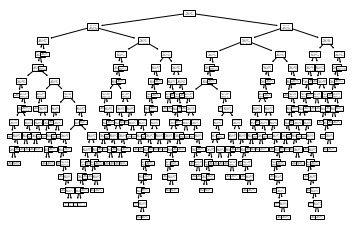

In [ ]:
tree.plot_tree(model)

In [ ]:
y_predict=model.predict(X_test)
y_predict

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
#Generating class names from the classes list
def prediction_class(y_predict):
  y_pred_classes=[]
  for i in y_predict:
    if i==0:
      y_pred_classes.append('Male')
    else:
      y_pred_classes.append('Female')
  return y_pred_classes





In [ ]:
import numpy as np

y_classes= np.array(prediction_class(y_predict))
y_classes

array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype='<U6')

In [ ]:
#Accuracy and report
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
classification_report = classification_report(y_test, y_predict)
accuracy_score=accuracy_score(y_test, y_predict)
recall_score= recall_score(y_test, y_predict)
f1_score=f1_score(y_test, y_predict)

In [ ]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95       499\n           1       0.95      0.95      0.95       502\n\n    accuracy                           0.95      1001\n   macro avg       0.95      0.95      0.95      1001\nweighted avg       0.95      0.95      0.95      1001\n'

In [ ]:
accuracy_score

0.952047952047952

In [ ]:
recall_score


0.954183266932271

In [ ]:
f1_score

0.952286282306163

# Now lets try with some modifications in the input data

In [ ]:
def z_scores(x):
  return np.abs((x-x.mean()) / x.std())

def remove_outliers(dataframe, columns, z_thresh):
  z_score = z_scores(dataframe[columns])
  cleaned_dataframe= dataframe[(z_score <z_thresh).all(axis=1)]
  return cleaned_dataframe
  

In [ ]:
cols= ['long_hair', 'gender']
z_thresh=3
cleaned_data= remove_outliers(gender_data, cols, z_thresh)

In [ ]:
cleaned_data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1
4997,1,11.9,5.4,0,0,0,0,1
4998,1,12.9,5.7,0,0,0,0,1
4999,1,13.2,6.2,0,0,0,0,1


In [ ]:
X= cleaned_data.drop(columns=['gender'])
y=cleaned_data['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict=model.predict(X_test)
y_predict

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
import numpy as np

y_classes= np.array(prediction_class(y_predict))
y_classes

array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype='<U6')

In [ ]:
#Accuracy and report
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
classification_report = classification_report(y_test, y_predict)
accuracy_score=accuracy_score(y_test, y_predict)
recall_score= recall_score(y_test, y_predict)
f1_score=f1_score(y_test, y_predict)

In [ ]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.95       499\n           1       0.95      0.96      0.95       502\n\n    accuracy                           0.95      1001\n   macro avg       0.95      0.95      0.95      1001\nweighted avg       0.95      0.95      0.95      1001\n'

In [ ]:
accuracy_score

0.9530469530469531

In [ ]:
recall_score

0.9581673306772909

In [ ]:
f1_score

0.9534192269573836